In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crypto = 'crypto_bitcoin'
# crypto = 'crypto_ethereum'
# crypto = 'crypto_xrp'

In [3]:
filetype =  'submission'
ts_prices = pd.read_csv("Data/Time_Series/prices/bitcoin.csv",index_col='date',parse_dates=['date'])

In [14]:
dfs = []
for filetype in ['submission','comment']:
    for sentiment in ['positive','negative','neutral']:
        print(f"{sentiment}_{filetype}_count.csv")
        df = pd.read_csv(f"Data/Time_Series/{crypto}/{sentiment}_{filetype}_count.csv",index_col='posted_on',parse_dates=['posted_on'])
        df['value'] = round((df.iloc[:,0]/df.iloc[:,1])*100,2)
        display(df.iloc[:5])
        dfs.append(df)

positive_submission_count.csv


,Positive,total_posts,value
posted_on,,,
2022-01-01,41.0,81.0,50.62
2022-01-02,26.0,83.0,31.33
2022-01-03,51.0,110.0,46.36
2022-01-04,29.0,81.0,35.80
2022-01-05,41.0,126.0,32.54


negative_submission_count.csv


,Negative,total_posts,value
posted_on,,,
2022-01-01,4.0,81.0,4.94
2022-01-02,2.0,83.0,2.41
2022-01-03,2.0,110.0,1.82
2022-01-04,3.0,81.0,3.70
2022-01-05,5.0,126.0,3.97


neutral_submission_count.csv


,Neutral,total_posts,value
posted_on,,,
2022-01-01,36.0,81.0,44.44
2022-01-02,55.0,83.0,66.27
2022-01-03,57.0,110.0,51.82
2022-01-04,49.0,81.0,60.49
2022-01-05,80.0,126.0,63.49


positive_comment_count.csv


,Positive,total_posts,value
posted_on,,,
2022-01-01,453,1002,45.21
2022-01-02,427,1052,40.59
2022-01-03,367,1002,36.63
2022-01-04,296,871,33.98
2022-01-05,654,1573,41.58


negative_comment_count.csv


,Negative,total_posts,value
posted_on,,,
2022-01-01,85,1002,8.48
2022-01-02,89,1052,8.46
2022-01-03,88,1002,8.78
2022-01-04,66,871,7.58
2022-01-05,112,1573,7.12


neutral_comment_count.csv


,Neutral,total_posts,value
posted_on,,,
2022-01-01,464,1002,46.31
2022-01-02,536,1052,50.95
2022-01-03,547,1002,54.59
2022-01-04,509,871,58.44
2022-01-05,807,1573,51.30


/Users/nikshubhakumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


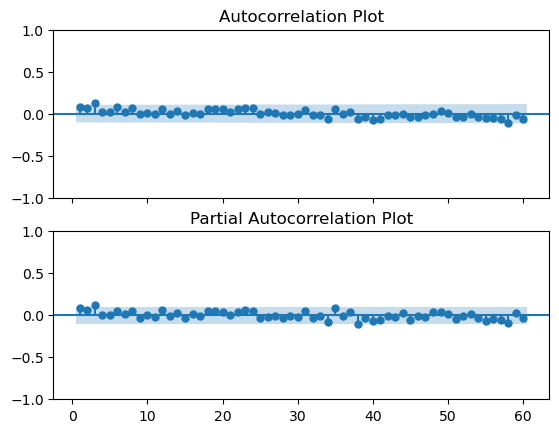

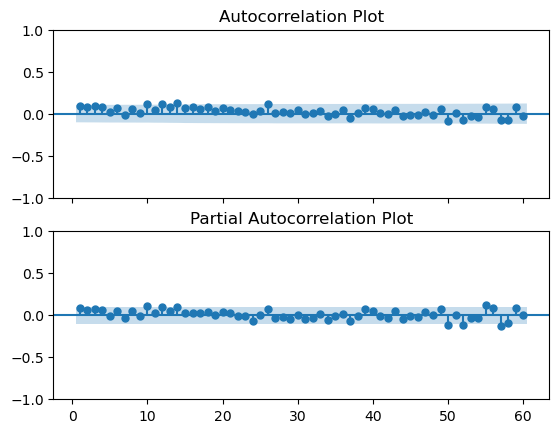

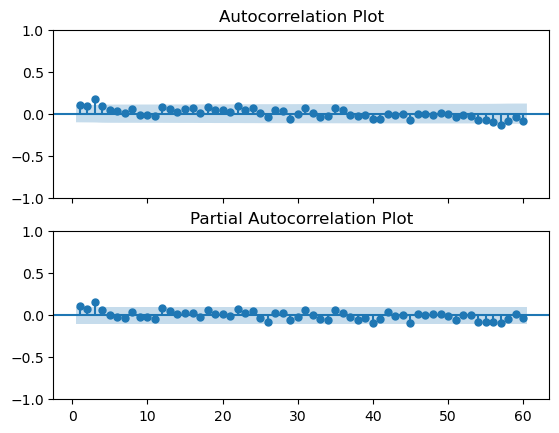

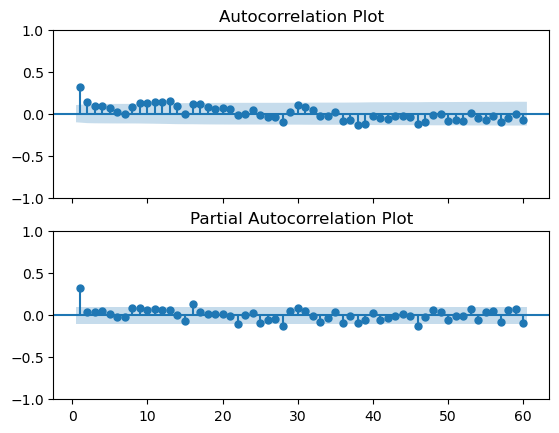

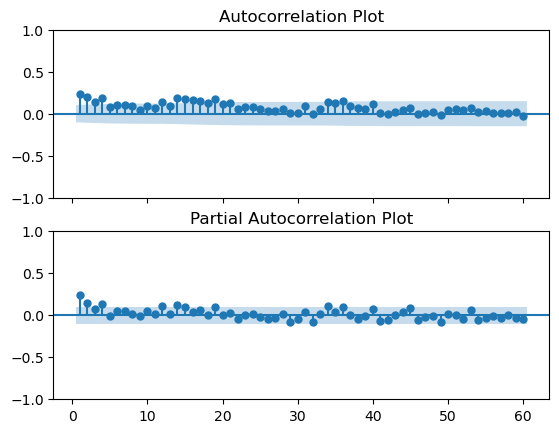

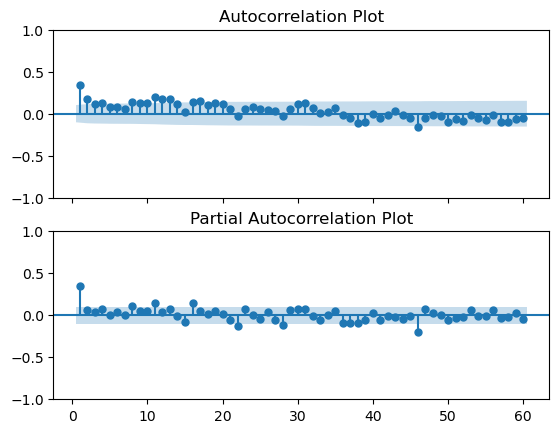

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for df in dfs:
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
    ax1, ax2 = axes.flatten()
    
    plot_acf(df['value'], lags=60, zero=False, alpha=.05, title='Autocorrelation Plot', ax=ax1);
    plot_pacf(df['value'], lags=60, zero=False, alpha=.05, title='Partial Autocorrelation Plot', ax=ax2);
    plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print('Augmented Dicky Fuller Test')
    labels = ['Test Statistic','p-value','Lag Used']
    output = list(result[:3]) + [result[-2]['5%'], result[-2]['1%']]
    for value, label in zip(output,labels):
        print(label+': '+str(round(value, 7)))
        
    if result[1] <= .05:
      print('Series is likely stationary')
    else:
       print('Series is likely non-stationary')

In [19]:
result = adfuller(dfs[0]['value'])

In [28]:
s = ['positive','negative','neutral']
f = ['submission','comment']
i = 0
j = 0
for df in dfs:
    print(f"{s[i]}_{f[j]}_count.csv")
    adf_test(df['value'])
    print('-'*10)
    i+=1
    if i == 3 :
        j = 1
        i = 0

positive_submission_count.csv
Augmented Dicky Fuller Test
Test Statistic: -8.8989598
p-value: 0.0
Lag Used: 2
Series is likely stationary
----------
negative_submission_count.csv
Augmented Dicky Fuller Test
Test Statistic: -17.3039612
p-value: 0.0
Lag Used: 0
Series is likely stationary
----------
neutral_submission_count.csv
Augmented Dicky Fuller Test
Test Statistic: -8.368294
p-value: 0.0
Lag Used: 2
Series is likely stationary
----------
positive_comment_count.csv
Augmented Dicky Fuller Test
Test Statistic: -13.7855817
p-value: 0.0
Lag Used: 0
Series is likely stationary
----------
negative_comment_count.csv
Augmented Dicky Fuller Test
Test Statistic: -6.6515462
p-value: 0.0
Lag Used: 3
Series is likely stationary
----------
neutral_comment_count.csv
Augmented Dicky Fuller Test
Test Statistic: -2.8213363
p-value: 0.0552901
Lag Used: 15
Series is likely non-stationary
----------
